US Visa Prediction Project

Life cycle of Machine learning Project

.Understand the problem Statment
.Data Collection
.Exploratory data analysis
.Data Cleaning
.Data pre-Processing
.Model Trainig
.Choose best model


About

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
df = pd.read_csv("D:\\Visa\\notebook\\EasyVisa.csv")

In [6]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
df.shape

(25480, 12)

In [8]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [10]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} numerical feature : {}'.format(len(numeric_feature), numeric_feature))
print('\nWe have {} categorical feature : {}'.format(len(categorical_feature), categorical_feature))

We have 3 numerical feature : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical feature : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [11]:
# porportion count

for col in categorical_feature:
    print(df[col].value_counts(normalize=True) * 100)
    print('<---------------->')

case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
<---------------->
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
<---------------->
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
<---------------->
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
<---------------->
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
<---------------->
region_of_employment
Northeast    28.237834
South        27.539246
West         

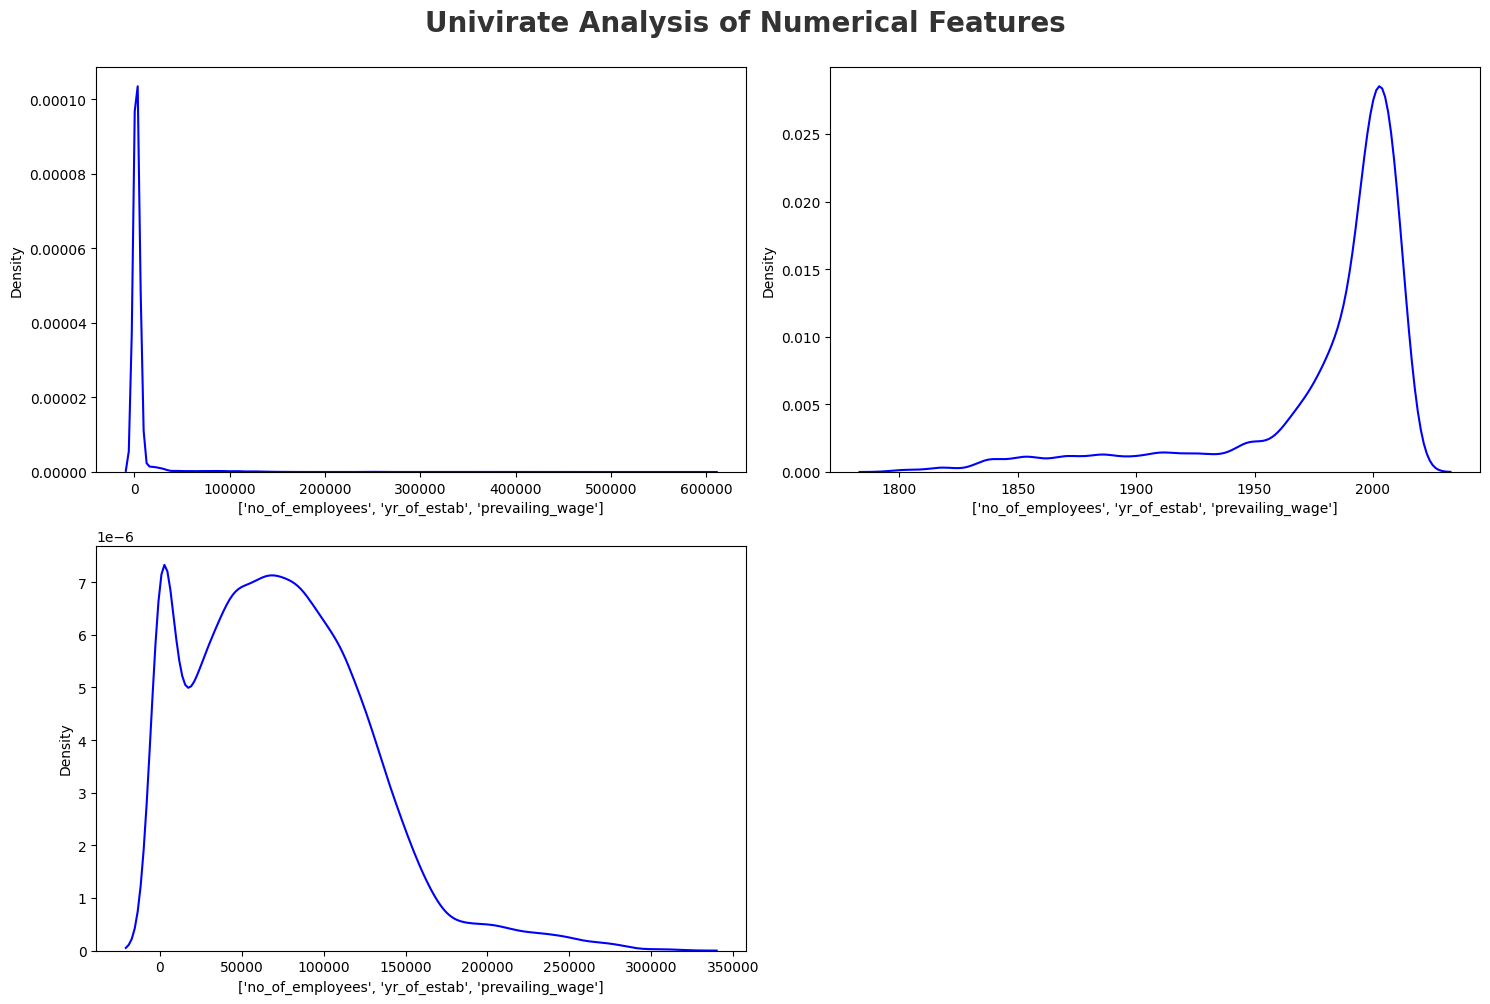

In [13]:
# Univariate Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.suptitle('Univirate Analysis of Numerical Features', fontsize = 20, fontweight='bold', alpha = 0.8, y=1.)


for i in range(0, len(numeric_feature)):
    plt.subplot(2,2, +i+1)
    sns.kdeplot(x=df[numeric_feature[i]], color='blue')
    plt.xlabel(numeric_feature)
    plt.tight_layout()

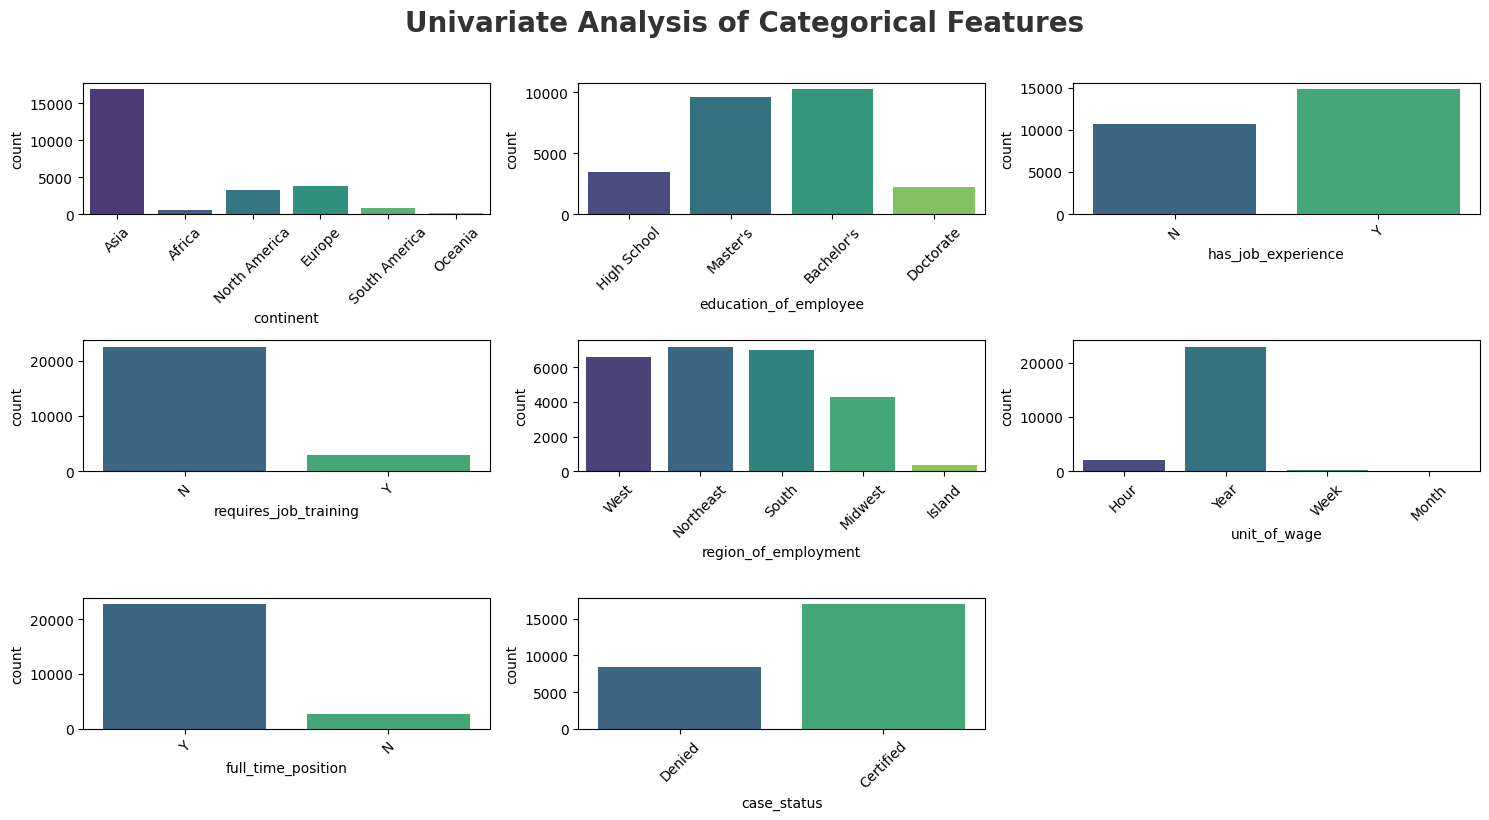

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Safely remove 'case_id' if present
if 'case_id' in categorical_feature:
    categorical_feature.remove('case_id')

# Create figure
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features',
             fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Loop through categorical features
for i in range(len(categorical_feature)):
    plt.subplot(3, 3, i + 1)  # Adjust grid size based on number of features
    sns.countplot(x=df[categorical_feature[i]], palette="viridis")
    plt.xlabel(categorical_feature[i], fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [21]:
discrete_feature = [feature for feature in numeric_feature if len(df[feature].unique())<=25]

continuous_feature = [feature for feature in numeric_feature if len(df[feature])> 25]

print('We have {} discrete features: {}'.format(len(discrete_feature), discrete_feature))

print('We have {} continuous feature: {}'.format(len(continuous_feature), continuous_feature))


We have 0 discrete features: []
We have 3 continuous feature: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
